In [1]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import tensorflow as tf
import json

from sklearn.model_selection import train_test_split

In [2]:
fname = 'C:\\Users\\arsayder\\PycharmProjects\\diff_masters\\brownian_motion\\2020-11-25200530135111.txt'
a = np.loadtxt(fname)

In [3]:
a

array([ 0.        , -0.00225054, -0.00441378, ...,  1.0697953 ,
        1.06885435,  1.0683058 ])

In [4]:
a = a.reshape(-1, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(a)

In [6]:
training_set_scaled.shape

(5000, 1)

In [7]:
X_train = []
y_train = []
for i in range(100, 5000):
    X_train.append(training_set_scaled[i-100:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [10]:
X_train.shape

(4900, 100, 1)

In [11]:
y_train.shape

(4900,)

In [12]:
y_train

array([0.0385062 , 0.03864199, 0.03770994, ..., 0.91785926, 0.9171117 ,
       0.91667588])

In [13]:
model.fit(X_train, y_train, epochs=100,batch_size=32)

Epoch 1/100
154/154 [==============================] - 7s 17ms/step - loss: 0.0346
Epoch 2/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0033
Epoch 3/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0029
Epoch 4/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0027
Epoch 5/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0025
Epoch 6/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0023
Epoch 7/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0028
Epoch 8/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0021
Epoch 9/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0020
Epoch 10/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0024
Epoch 11/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0017
Epoch 12/100
154/154 [==============================] - 3s 17ms/step - loss: 0.0018
E

In [40]:
test_set = np.loadtxt(fname)

In [41]:
test_set = test_set[4000:]

In [42]:
test_set.shape

(1000,)

In [43]:
inputs = test_set.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100, 1000):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

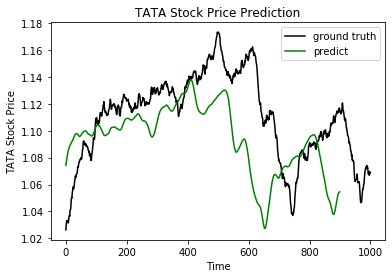

In [44]:
plt.plot(test_set, color = 'black', label = 'ground truth')
plt.plot(predicted_stock_price, color = 'green', label = 'predict')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [37]:
fname2 = 'C:\\Users\\arsayder\\PycharmProjects\\diff_masters\\samples2020-11-252015527850512.txt'
test_set_fbm = np.loadtxt(fname2)
test_set_fbm = test_set_fbm[4000:]

In [38]:
inputs = test_set_fbm.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100, 1000):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

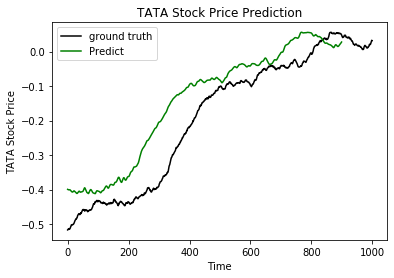

In [39]:
plt.plot(test_set_fbm, color = 'black', label = 'ground truth')
plt.plot(predicted_stock_price, color = 'green', label = 'Predict')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

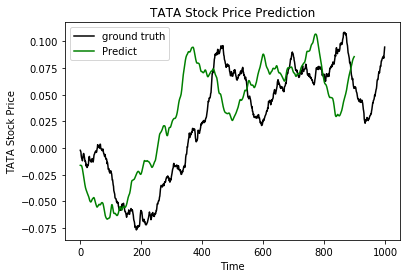

In [35]:
fname2 = 'C:\\Users\\arsayder\\PycharmProjects\\diff_masters\\samples2020-11-25201552756025.txt'
test_set_fbm = np.loadtxt(fname2)
test_set_fbm = test_set_fbm[4000:]
inputs = test_set_fbm.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100, 1000):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(test_set_fbm, color = 'black', label = 'ground truth')
plt.plot(predicted_stock_price, color = 'green', label = 'Predict')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()